[0.05731188878417015, 0.05731188878417015, 0.2803652882575989, 0.2803652882575989, 0.49845919013023376, 0.49845919013023376, 0.4569348990917206, 0.4569348990917206, 0.39788761734962463, 0.39788761734962463, 0.48525869846343994, 0.48525869846343994, 0.40838178992271423, 0.40838178992271423, 0.468210905790329, 0.468210905790329, 0.4604816436767578, 0.4604816436767578, 0.5554735064506531, 0.5554735064506531, 0.3358025550842285, 0.3358025550842285, 0.4900546073913574, 0.4900546073913574, 0.4829869568347931, 0.4829869568347931, 0.5636487007141113, 0.5636487007141113, 0.5083763003349304, 0.5083763003349304, 0.5428868532180786, 0.5428868532180786, 0.4643813967704773, 0.4643813967704773, 0.5271361470222473, 0.5271361470222473, 0.5419696569442749, 0.5419696569442749, 0.4674466550350189, 0.4674466550350189, 0.4561694860458374, 0.4561694860458374, 0.505767285823822, 0.505767285823822, 0.5213456749916077, 0.5213456749916077, 0.5804254412651062, 0.5804254412651062, 0.5286516547203064, 0.52865165472

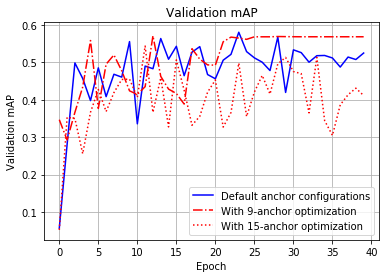

In [1]:
# before and after anchor_optimization comparison
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np

tensorboard_path_1 = r"D:\Studying\RetinaNet_snapshots\12_06_2020_no_random_transform\logs"
tensorboard_path_2 = r"D:\Studying\RetinaNet_snapshots\26_06_2020_anchor_opt_9\logs"
tensorboard_path_3 = r"D:\Studying\RetinaNet_snapshots\12_06_2020_anchor_opt_15anchors\logs"

ea_1 = event_accumulator.EventAccumulator(tensorboard_path_1)
ea_1.Reload()
ea_2 = event_accumulator.EventAccumulator(tensorboard_path_2)
ea_2.Reload()
ea_3 = event_accumulator.EventAccumulator(tensorboard_path_3)
ea_3.Reload()

# First event object
mAP_1 = ea_1.scalars.Items('mAP')
# Second event object
mAP_2 = ea_2.scalars.Items('mAP')
# Third event object
mAP_3 = ea_3.scalars.Items('mAP')


mAP_1_plot = [j.value for j in mAP_1]

mAP_2_plot = [j.value for j in mAP_2]

print(mAP_1_plot)


mAP_3_plot = [j.value for j in mAP_3]
# Plot validation mAP
plt.figure(2)
steps = [j.step for j in mAP_1]
p1, = plt.plot(steps, mAP_1_plot, color = 'b')
p2, = plt.plot(steps, mAP_2_plot, color = 'r', linestyle = '-.')
p3, = plt.plot(steps, mAP_3_plot, color = 'r', linestyle = ':')


plt.legend(handles=[p1, p2, p3],labels=['Default anchor configurations', 'With 9-anchor optimization','With 15-anchor optimization'],loc='best')
plt.xlabel('Epoch')
plt.ylabel('Validation mAP')
plt.title('Validation mAP')
plt.grid()
plt.savefig('comparison_anchor_optimization.pdf', dpi=500, bbox_inches = 'tight')
plt.show()